# Case Study by: Tertius Ferraz

## Objective: Classification project to determine if a truck's air system is defective and send to to maintenance before it breaks

1. What steps would you take to solve this problem? Please describe as completely and clearly as possible all the steps that you see as essential for solving the problem.  
    **1. Load the dataset using pandas**  
    **2. Exploratory data analysis**   
    **3. treat features who have lots of missing value.**   
    **4. preprocess the dataframe**  
    **5. train machine learning models and evaluate them**  
    **6. evaluate how our results solve the business problem**  
    **7. evaluate the financial impact**  
    **8. put it into production**  
    **9. monitor our model. if it starts to depreciate the metrics, retrain it**  
2. Which technical data science metric would you use to solve this challenge? Ex: absolute error, rmse, etc.  
    **1. the best metric for our problem is recall, we want to avoid false negative as much as possible, since if we don't detect a defect in the air system it will cost a lot of money**  
    **2. Cost based matrix: will incorporate the cost associated with True positives, True negatives, False positives and False negatives**
3. Which business metric  would you use to solve the challenge?  
    **1. ROI: Return on investment. The model needs to be good to reduce costs and be viable.**  
    **2. Variable costs: need to be reduced or be predictable, then the business can better access the situation**  
    **3. Operating expenses: how much the business will spend to build and monitor the model**  
    **4. Cost saving, reduction in downtime and improved safety records**
4. How do technical metrics relate to the business metrics?  
    **1. Tecnical metrics like recall and accuracy will indicate with good precision how much the bussiness can save by doing the maintenance on the trucks with a defect air system. they relate with the cost and with ROI in the bussiness**  
5. What types of analyzes would you like to perform on the customer database?  
    **1. I would like to do invididual boxplots to see distrubuitions of data and chi-squared on the contigency table to see which features have correlation with the target**  
    **2. I would like to see the trucks uptime, mean time between defects, mean repair time, percentual of planned maitenance, percentual of emergency maintenance, maintenance backlog** 
    **3. Correlation matrix, feature importance and clustering, so we can understand the patterns better.**
6. What techniques would you use to reduce the dimensionality of the problem?   
    **1. To reduce dimensionality we can use PCA and LASSO**
7. What techniques would you use to select variables for your predictive model?  
    **1. Feature importance after a random forest seem very good, since the features are masked.**
    **2. Shap values are also a great indicator**
    **3. Also L1 regularization and recursive feature elimination**  
8. What predictive models would you use or test for this problem? Please indicate at least 3.  
    **1. I would test logistic regression, random forest, xgboost, SVM and neural networks would also be great**
9. How would you rate which of the trained models is the best?  
    **1. I would look into data from cross validation and compare it using friedman test with post hoc of nemenyi**  
    **2. Confusion matrix also are a good indicator**  
10. How would you explain the result of your model? Is it possible to know which variables are most important?  
    **1.I would start explaining about the recall metric and how we need to prevent false negatives, since they can be very costly, then I would show how much they would save with our model, since we can calculate how much it did cost to them in the year 2022. If A = number of trucks sent for maintenance, but it does not show any defect, B = number of truckc sent for maintenance and it is defective in this system and C = truck with defects in the air system is not sent directly for maintenance. We can calculate the total cost by year with Total_cost = 10*A + 25*B * 500*C.** 
    **2. Yes, it is possible to know which variables are most important, for example, we can use feature_importance from a random_forest model

11. How would you assess the financial impact of the proposed model?  
    **1. Since we are using a classification problem let's say we have 88.8% recall and accuracy 98.8% and the year is 2022 in our model. we would have total cost be 147 * 10 + 333 * 25 + 42 * 500 = 30.795 instead of the 375k spent during 2022**  
    **2. Include a sensitivity analysis to show how changes in recall will impact the business**  
12. What techniques would you use to perform the hyperparameter optimization of the chosen model?  
    **1. GridSearchCV and RandomSearchCV with a paramgrid are very good methods for hyperparameter search**  
13. What risks or precautions would you present to the customer before putting this model into production?  
    **1. Over time the model performance may depreciate due to change in data patterns, then it is necessary to monitor and plan regular retraining and updates to the model**  
    **2. Caution about data breachs or misuse of sensitive data, then it is need to perform data encryption and have compliance with data protection regulations.**  
    **3. risk of the model not handling large volumes of data requests, then is needed scalability, possibly with kubernets.**  
    **4. To be carefull with changes when integrate in existing systems**  
14. If your predictive model is approved, how would you put it into production?  
    **1. I would ensure the model is optimized and working how it is intended.**  
    **2. Save the model using pickle**  
    **3. Choose a cloud to deploy (GCP, Azure, AWS) and setup the dependencies**  
    **4. Develop an API that will serve the model and handle all the requests**  
    **5. Put the model into a container with the API and the dependencies.**  
    **6. Deploy the model with a CI/CD pipeline**  
    **7. Monitor the model**  
    **8. Test the API under load to ensure it can handle the expected number of requests.**  
    **9. Validate the predictions and ensure they meet the business requirements.**  
    **10. Maintenance the model, planning regular retraining and updates when needed.**  
15. If the model is in production, how would you monitor it?  
    **1. I would monitor it's metrics, especially recall and accuracy, since we want to avoid false negativs.** 
    **1. I would monitor prediction distribuition changes and data drift.**    
16. If the model is in production, how would you know when to retrain it?  
    **1. If the recall and the other metrics start to depreciate and fall bellow a threshold set buy the business, then we would retrain the model to have metrics that make sense for the business**  


In [1]:
#importing all the important libraries we will use in this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.pipeline import Pipeline

from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

# Loading the datasets

In [2]:
filepath = 'C:/Users/terti/jupyter_lab/Portfolio/bix/air_system_previous_years.csv'
df = pd.read_csv(filepath)

In [3]:
filepath2 = 'C:/Users/terti/jupyter_lab/Portfolio/bix/air_system_present_year.csv'
df2 = pd.read_csv(filepath2)

# Exploratory data analysis

In [4]:
df2.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [5]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [6]:
print(df.isna().sum())

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64


In [7]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

since almost all features are type object and NAN values are filled with 'na', it is not showing the NAN values. we will first remove the 'na' from our datasets and the sum the NAN values

In [8]:
df.replace('na', pd.NA, inplace=True)
df2.replace('na', pd.NA, inplace=True)

In [9]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,<NA>,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,<NA>,0,<NA>,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,<NA>,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,<NA>,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


Now we cann see that are a lot of missing values in our dataset

In [10]:
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [11]:
df2.isnull().sum()

class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
          ...  
ee_007      192
ee_008      192
ee_009      192
ef_000      762
eg_000      762
Length: 171, dtype: int64

In [12]:
# we will convert all the dtypes object into floats, since our database, apart from the feature class are all numbers. 
columns_to_convert = df.columns[1:]

# Convert to float
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

columns_to_convert = df2.columns[1:]

# Convert to float
df2[columns_to_convert] = df2[columns_to_convert].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)
print(df2.dtypes)

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object
class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


In [13]:
print(df.head())
print(df2.head())

  class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3     0.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  


In [14]:
print(df.describe())
print(df2.describe())

             aa_000        ab_000        ac_000        ad_000        ae_000  \
count  6.000000e+04  13671.000000  5.666500e+04  4.513900e+04  57500.000000   
mean   5.933650e+04      0.713189  3.560143e+08  1.906206e+05      6.819130   
std    1.454301e+05      3.478962  7.948749e+08  4.040441e+07    161.543373   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    8.340000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000   
50%    3.077600e+04      0.000000  1.520000e+02  1.260000e+02      0.000000   
75%    4.866800e+04      0.000000  9.640000e+02  4.300000e+02      0.000000   
max    2.746564e+06    204.000000  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  57500.000000  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean      11.006817  2.216364e+02  9.757223e+02  8.606015e+03  8.859128e+04   
std      209.792592  2.047846e+04  3.420053e+04  1.

Now we will calculate the percent of NAN values in each column and remove from the previous year all columns which have more than 10% of NAN values. to maintain consistency all the columns removed from the previous year will be removed from current year

In [15]:
# Calculate the percentage of NAN values in each column
null_percentages = df.isnull().mean() * 100

# Identify and remove columns which have more than 10% of NAN values
columns_to_drop = null_percentages[null_percentages > 10].index
df.drop(columns=columns_to_drop, inplace=True)

In [16]:
df2.drop(columns=columns_to_drop, inplace=True)

In [17]:
df.head()

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [18]:
df['class'].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

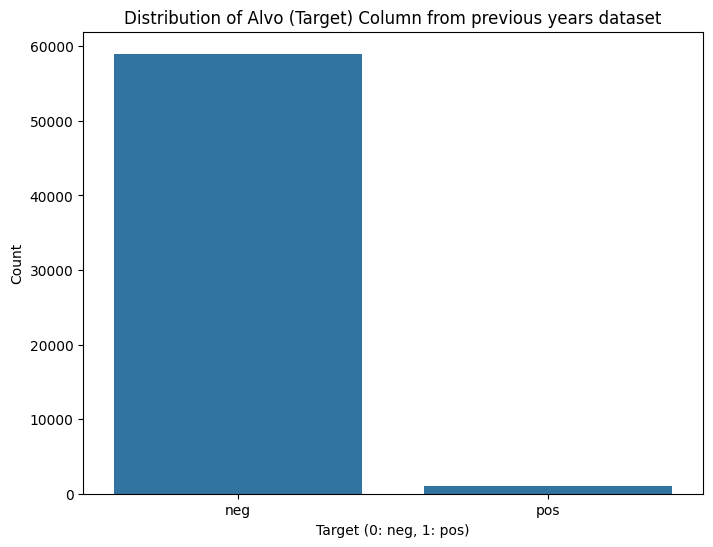

In [19]:
# plotting the distribuition of our target column
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Distribution of Alvo (Target) Column from previous years dataset')
plt.xlabel('Target (0: neg, 1: pos)')
plt.ylabel('Count')
plt.show()

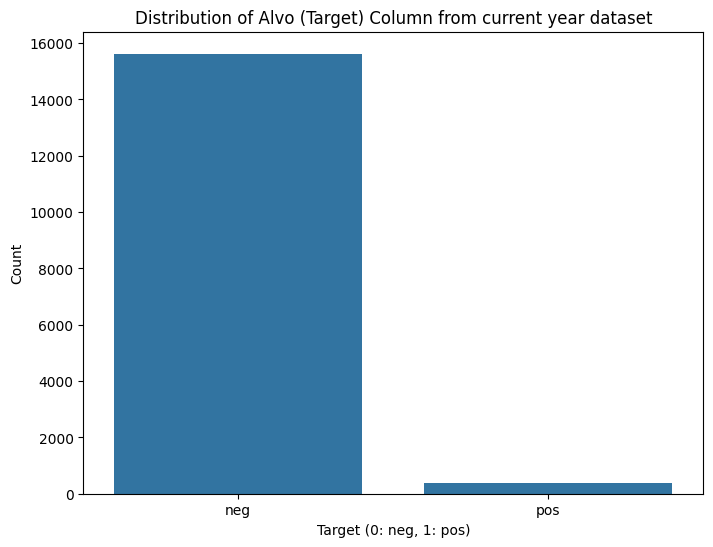

In [20]:
# plotting the distribuition of our target column
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df2)
plt.title('Distribution of Alvo (Target) Column from current year dataset')
plt.xlabel('Target (0: neg, 1: pos)')
plt.ylabel('Count')
plt.show()

As we can see both previous and current year are heavily inbalanced. if needed we will do class balancing

In [21]:
df['class']

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

Now we will map in our dataframe the target column to be only numerals where 'neg': 0 and 'pos': 1

In [22]:
map = {'neg': 0, 'pos': 1}
df['class'] = df['class'].map(map)

In [23]:
map = {'neg': 0, 'pos': 1}
df2['class'] = df2['class'].map(map)

First we will divide the dataframe from previous years in train(80%) and test(20%). We will do this so we can train and evaluate our model. After this we can than confront if this model was already in production in the year 2022 and see it's performance for the business and how much money it would save them.

# Preprocessing the data

First we aplit the data and them we preprocess to avoid data leakage

In [24]:
# Defining our features and target class. X_test_cy will be current year we will test after to evaluate the bussiness metrics
y = df['class']
X = df.drop(columns=['class'])
X_test_cy = df2.drop(columns=['class'])
y_test_cy = df2['class']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [25]:
y_test_cy.value_counts()

class
0    15625
1      375
Name: count, dtype: int64

## Pipeline to transform the data

In [26]:
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# applying the pipeline
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_test_cy = pipeline.transform(X_test_cy)

# Verifying dimensions after transform
print(X_train.shape, X_test.shape)

(48000, 142) (12000, 142)


# Training machine learning models

## Logistic regression

In [27]:
param_grid = {'C':  np.linspace(0.01, 10, 20)}
grid_search_LR = GridSearchCV(LogisticRegression(max_iter=1000), param_grid = param_grid, cv=10, refit='recall')  
grid_search_LR.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([ 0.01      ,  0.53578947,  1.06157895,  1.58736842,  2.11315789,
        2.63894737,  3.16473684,  3.69052632,  4.21631579,  4.74210526,
        5.26789474,  5.79368421,  6.31947368,  6.84526316,  7.37105263,
        7.89684211,  8.42263158,  8.94842105,  9.47421053, 10.        ])},
             refit='recall')

In [28]:

# getting the model best params
best_params = grid_search_LR.best_params_

best_LR = grid_search_LR.best_estimator_

print(f'Best params: {best_params}')
print(f'Best cross_validation score: {grid_search_LR.best_score_:.4f}')

Best params: {'C': 2.6389473684210527}
Best cross_validation score: 0.9914


In [29]:
# Making predictions and printing it
y_pred = best_LR.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)

print(f"Acurracy on test set: {accuracy:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 on test set: {f1:.4f}")
print(f"Precision on test set: {precision:.4f}")

Acurracy on test set: 0.9905
Recall on test set: 0.6500
F1 on test set: 0.6952
Precision on test set: 0.7471


Not a good result. it may be because the classes are inbalanced. if the other models do not have good performance, we will have to do something about it

## Random Forest

In [30]:
# Defining the gridsearch params
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initializing the random forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='recall')

grid_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=2)

In [31]:
# getting the best params from our model
best_params = grid_search_rf.best_params_

best_rf = grid_search_rf.best_estimator_
# Printing the best params and the best score
print(f'Best params: {best_params}')

Best params: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [32]:
# making predictions on our model
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)

print(f"Acurracy on test set: {accuracy:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 on test set: {f1:.4f}")
print(f"Precision on test set: {precision:.4f}")

Acurracy on test set: 0.9773
Recall on test set: 0.9250
F1 on test set: 0.5763
Precision on test set: 0.4186


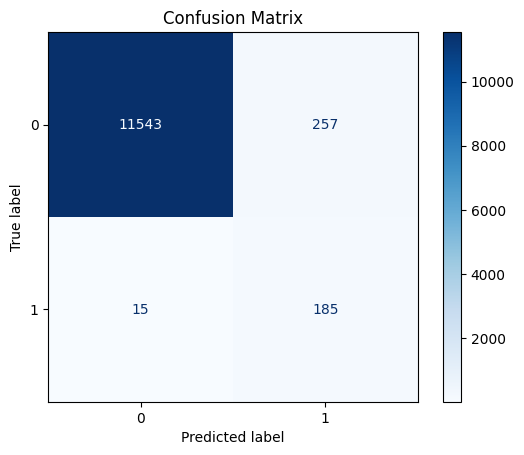

In [33]:
cm = confusion_matrix(y_test, y_pred)

# plotting the confussion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

We have a very good result here. Our goal is to minimize false negatives, we only have 15 of the total 200. 92.5% recall is very good. false positives is not a very big problem since it only cost $ 10 to send a truck to maintenance to not show any defect

### Doing a feature selection to see which have the most impact on our model

In [34]:
# Capturing the feature importances from our best model
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Ranking of best features
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

Feature ranking:
1. feature 22 (0.09222710137394102)
2. feature 81 (0.06743366337455389)
3. feature 0 (0.06268853089897908)
4. feature 83 (0.05805813081905785)
5. feature 72 (0.0494670794555956)
6. feature 70 (0.04654584064696486)
7. feature 23 (0.044644169062236214)
8. feature 68 (0.04133637565687552)
9. feature 116 (0.0407157112781219)
10. feature 14 (0.03546590073425058)
11. feature 66 (0.02954548698568162)
12. feature 65 (0.023012560331131113)
13. feature 40 (0.022305478331791067)
14. feature 20 (0.019006844620113515)
15. feature 95 (0.016959753245845803)
16. feature 71 (0.016869111134563505)
17. feature 21 (0.016395764482291204)
18. feature 53 (0.0163303335444342)
19. feature 130 (0.016294630531804122)
20. feature 73 (0.013066537423893748)
21. feature 60 (0.012762689057330178)
22. feature 54 (0.012601893309845883)
23. feature 98 (0.011555246834356717)
24. feature 100 (0.01097502934557992)
25. feature 78 (0.010808857209058217)
26. feature 52 (0.010215935532156332)
27. feature 38 (0

If needed we can see which are theese features in the dataframe

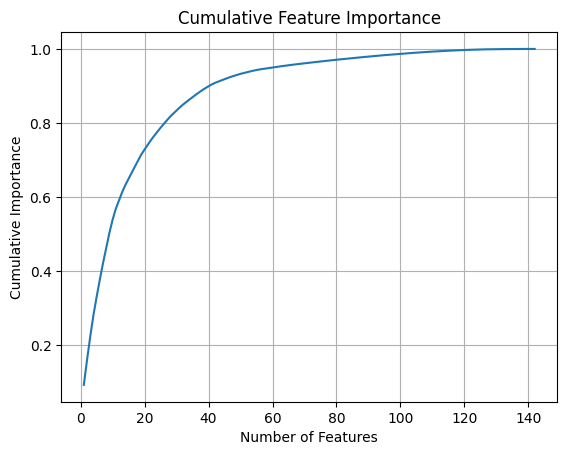

In [35]:
cumulative_importance = np.cumsum(importances[indices])

plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance)
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid(True)
plt.show()

We Will choose the top 120 features just so our model don't lose performance

In [36]:
top_n_features = 120
X_train_top = X_train[:, indices[:top_n_features]]
X_test_top = X_test[:, indices[:top_n_features]]

# Retraining the model with top features
best_rf_top = grid_search_rf.best_estimator_
best_rf_top.fit(X_train_top, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [37]:
y_pred_top = best_rf_top.predict(X_test_top)

accuracy = accuracy_score(y_test, y_pred_top)
recall = recall_score(y_test, y_pred_top)
f1 = f1_score(y_test, y_pred_top)
precision = precision_score(y_test, y_pred_top, zero_division=0)

print(f"Acurracy on test set: {accuracy:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 on test set: {f1:.4f}")
print(f"Precision on test set: {precision:.4f}")

Acurracy on test set: 0.9784
Recall on test set: 0.9150
F1 on test set: 0.5856
Precision on test set: 0.4306


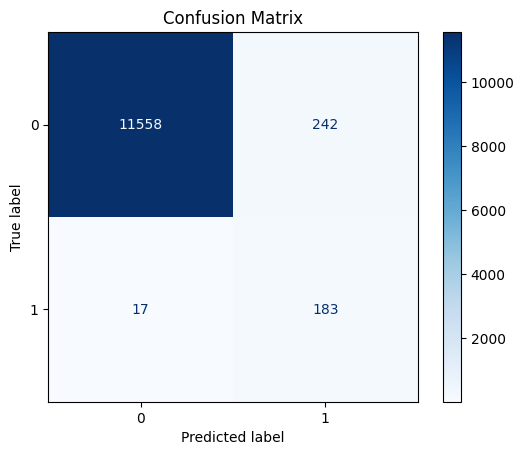

In [38]:
cm = confusion_matrix(y_test, y_pred_top)

# plotting the confussion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Simple XGBOOST

In [39]:
# Putting weight in our xgboost model so we can solve our class inbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [40]:
# Predicting and metrics
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')

print(f"Acurracy on test set: {accuracy:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 on test set: {f1:.4f}")
print(f"Precision on test set: {precision:.4f}")
print(f"ROC-AUC on test set: {roc_auc:.4f}")

Acurracy on test set: 0.9932
Recall on test set: 0.8300
F1 on test set: 0.8019
Precision on test set: 0.7757
ROC-AUC on test set: 0.9918


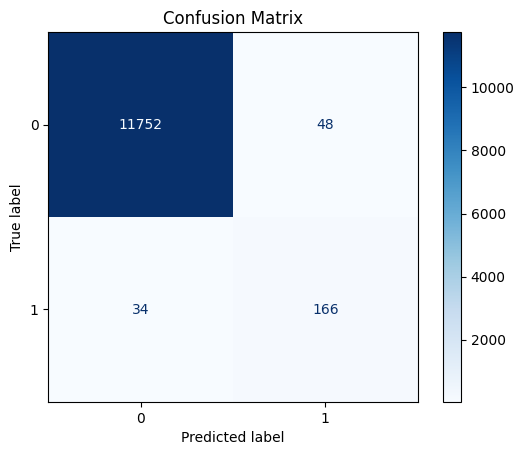

In [41]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

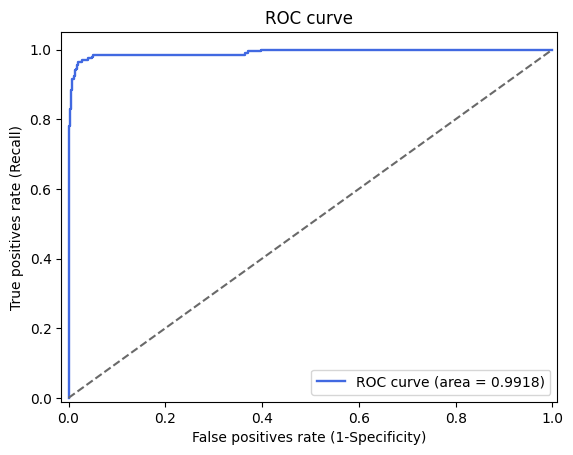

In [42]:
# ROC_AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='#4169E1', lw=1.7, label='ROC curve (area = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], color='#696969', lw=1.5, linestyle='--')
plt.xlim([-0.015, 1.01])
plt.ylim([-0.011, 1.05])
plt.xlabel('False positives rate (1-Specificity)')
plt.ylabel('True positives rate (Recall)')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

## XGBOOST with GridSearchCV

In [43]:
# Params for gridsearch
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [8, 9],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.5, 0.6],
}

# GridSearch
grid_search = GridSearchCV(xgb_model, param_grid = param_grid, cv=10, scoring='recall', n_jobs=-1, verbose=2, return_train_score=True)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.6],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [8, 9], 'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 0.9]},
             return_train_score=True, scoring='recall', verbose=2)

In [44]:
best_xgb = grid_search.best_estimator_

# Imprimindo os melhores parâmetros e o melhor score
print(f'Best params: {grid_search.best_params_}')
print(f'Best Cross validation score: {grid_search.best_score_:.4f}')

Best params: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}
Best Cross validation score: 0.8662


In [45]:
# making predictions with our best xgboost model
y_pred_test = grid_search.predict(X_test)
y_probs = grid_search.predict_proba(X_test)[:, 1]

In [46]:
# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Acurracy on test set: {accuracy:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 on test set: {f1:.4f}")
print(f"Precision on test set: {precision:.4f}")

Acurracy on test set: 0.9876
Recall on test set: 0.9200
F1 on test set: 0.7118
Precision on test set: 0.5804


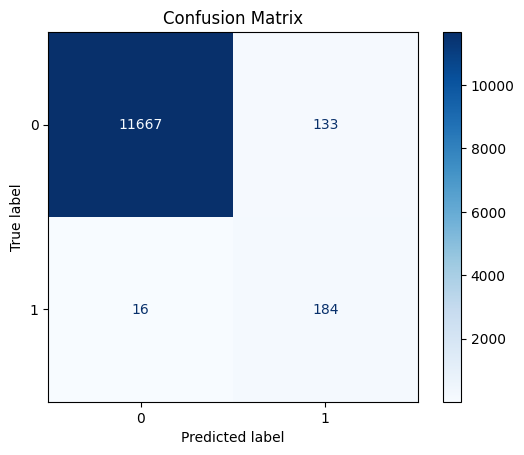

In [47]:
cm = confusion_matrix(y_test, y_pred_test)

# Ploting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average = 'weighted')
recall = recall_score(y_test, y_pred_test, average = 'weighted')
f1 = f1_score(y_test, y_pred_test, average = 'weighted')

print(f"Acurracy on test set: {accuracy:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 on test set: {f1:.4f}")
print(f"Precision on test set: {precision:.4f}")

Acurracy on test set: 0.9876
Recall on test set: 0.9876
F1 on test set: 0.9890
Precision on test set: 0.9917


Now we will try to apply a threshold on our prediction to see how our model perform

In [49]:
# Predicting the probabilities
y_probs = grid_search.predict_proba(X_test)

# Function to calculate the weighted recall for a specific threshold
def recall_threshold(y_true, y_probs, threshold):
    # Prever classes baseadas no threshold
    y_pred = np.argmax(y_probs >= threshold, axis=1)
    return recall_score(y_true, y_pred)

# Defining thresholds
thresholds = np.linspace(0, 1, 100)

# Calculate the weighted recall for each threshold
recalls = [recall_threshold(y_test, y_probs, t) for t in thresholds]

# Finding the best threshold
best_threshold = thresholds[np.argmax(recalls)]
best_recall = max(recalls)

print(f'best Threshold: {best_threshold}')
print(f'recall with best threshold: {best_recall}')

# Predicting with best threshold
y_pred_test = np.argmax(y_probs >= best_threshold, axis=1)

best Threshold: 0.494949494949495
recall with best threshold: 0.92


Best threshold is already very close to the default threshold, no improvements here.

In [50]:
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')

print(f"Acurracy on test set: {accuracy:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 on test set: {f1:.4f}")
print(f"Precision on test set: {precision:.4f}")
print(f"ROC-AUC on test set: {roc_auc:.4f}")

Acurracy on test set: 0.9878
Recall on test set: 0.9200
F1 on test set: 0.7146
Precision on test set: 0.5841
ROC-AUC on test set: 0.9918


In [51]:
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovo')

print(f"Acurracy on test set: {accuracy:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 on test set: {f1:.4f}")
print(f"Precision on test set: {precision:.4f}")
print(f"ROC-AUC on test set: {roc_auc:.4f}")

Acurracy on test set: 0.9878
Recall on test set: 0.9878
F1 on test set: 0.9891
Precision on test set: 0.9917
ROC-AUC on test set: 0.9918


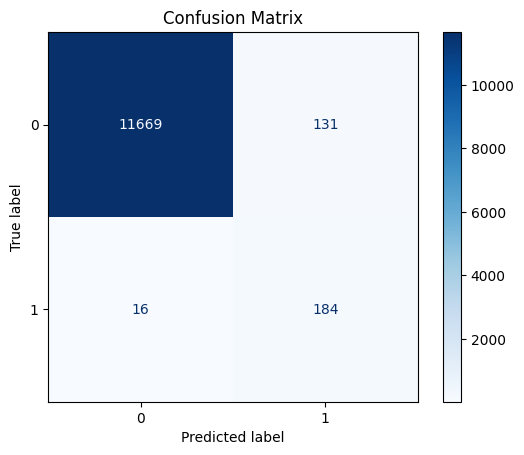

In [52]:
cm = confusion_matrix(y_test, y_pred_test)

# Ploting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [53]:
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score, zero_division = 0)
}

# Friedman test

Now we will get the scores from the crossvalidate and do the friedman test.   
H0 (Null Hypotesis): there is **no** statistically significant difference between the samples  
H1 (Alternate Hypotesis) : There is statistically significant difference between the samples

In [54]:
LR_cv_results = cross_validate(best_LR, X_train, y_train, cv=10, scoring=scorers)

In [55]:
RF_cv_results = cross_validate(best_rf, X_train, y_train, cv=10, scoring=scorers)

In [56]:
xgb_cv_results = cross_validate(best_xgb, X_train, y_train, cv=10, scoring=scorers)

## Accuracy

In [57]:
friedman_result = friedmanchisquare(LR_cv_results['test_accuracy'], RF_cv_results['test_accuracy'], xgb_cv_results['test_accuracy'])

print('Friedman test result:', friedman_result)

Friedman test result: FriedmanchisquareResult(statistic=19.53846153846155, pvalue=5.718432307658726e-05)


P value < 0.05 (level of significance). Then we reject the null hypothesis H0 and accept the alternate Hypotesis H1.  
We weill then do **Nemenyi** Post hoc to rank the algorithms

In [58]:
data = np.array([LR_cv_results['test_accuracy'], RF_cv_results['test_accuracy'], xgb_cv_results['test_accuracy']])
    
# Nemenyi test
nemenyi_result = sp.posthoc_nemenyi_friedman(data.T)

ranks = np.argsort(np.argsort(-data, axis=0), axis=0) + 1
mean_ranks = np.mean(ranks, axis=1)
model_names = ['LR', 'RF', 'xgb']
sorted_indices = np.argsort(mean_ranks)
for i in sorted_indices:
    print(f'{model_names[i]}: Rank médio = {mean_ranks[i]:.5f}')

LR: Rank médio = 1.00000
xgb: Rank médio = 2.00000
RF: Rank médio = 3.00000


## Recall

In [59]:
friedman_result = friedmanchisquare(LR_cv_results['test_recall'], RF_cv_results['test_recall'], xgb_cv_results['test_recall'])

print('Friedman test result:', friedman_result)

Friedman test result: FriedmanchisquareResult(statistic=16.80000000000001, pvalue=0.00022486732417884692)


P value < 0.05 (level of significance). Then we reject the null hypothesis H0 and accept the alternate Hypotesis H1.  
We weill then do **Nemenyi** Post hoc to rank the algorithms

In [60]:
data = np.array([LR_cv_results['test_recall'], RF_cv_results['test_recall'], xgb_cv_results['test_recall']])
    
# Nemenyi test
nemenyi_result = sp.posthoc_nemenyi_friedman(data.T)

ranks = np.argsort(np.argsort(-data, axis=0), axis=0) + 1
mean_ranks = np.mean(ranks, axis=1)
model_names = ['LR', 'RF', 'xgb']
sorted_indices = np.argsort(mean_ranks)
for i in sorted_indices:
    print(f'{model_names[i]}: Rank médio = {mean_ranks[i]:.5f}')

RF: Rank médio = 1.20000
xgb: Rank médio = 1.80000
LR: Rank médio = 3.00000


Our main metrics. We want to avoid False positives as much as possible, RF is performing slightly better than XGBoost

## F1

In [61]:
friedman_result = friedmanchisquare(LR_cv_results['test_f1'], RF_cv_results['test_f1'], xgb_cv_results['test_f1'])

print('Friedman test result:', friedman_result)

Friedman test result: FriedmanchisquareResult(statistic=15.200000000000017, pvalue=0.0005004514334406062)


P value < 0.05 (level of significance). Then we reject the null hypothesis H0 and accept the alternate Hypotesis H1.  
We weill then do **Nemenyi** Post hoc to rank the algorithms

In [62]:
data = np.array([LR_cv_results['test_f1'], RF_cv_results['test_f1'], xgb_cv_results['test_f1']])
    
# Nemenyi test
nemenyi_result = sp.posthoc_nemenyi_friedman(data.T)

ranks = np.argsort(np.argsort(-data, axis=0), axis=0) + 1
mean_ranks = np.mean(ranks, axis=1)
model_names = ['LR', 'RF', 'xgb']
sorted_indices = np.argsort(mean_ranks)
for i in sorted_indices:
    print(f'{model_names[i]}: Rank médio = {mean_ranks[i]:.5f}')

xgb: Rank médio = 1.40000
LR: Rank médio = 1.60000
RF: Rank médio = 3.00000


## Precision

In [63]:
friedman_result = friedmanchisquare(LR_cv_results['test_precision'], RF_cv_results['test_precision'], xgb_cv_results['test_precision'])

print('Friedman test result:', friedman_result)

Friedman test result: FriedmanchisquareResult(statistic=20.0, pvalue=4.539992976248486e-05)


P value < 0.05 (level of significance). Then we reject the null hypothesis H0 and accept the alternate Hypotesis H1.  
We weill then do **Nemenyi** Post hoc to rank the algorithms

In [64]:
data = np.array([LR_cv_results['test_precision'], RF_cv_results['test_precision'], xgb_cv_results['test_precision']])
    
# Nemenyi test
nemenyi_result = sp.posthoc_nemenyi_friedman(data.T)

ranks = np.argsort(np.argsort(-data, axis=0), axis=0) + 1
mean_ranks = np.mean(ranks, axis=1)
model_names = ['LR', 'RF', 'xgb']
sorted_indices = np.argsort(mean_ranks)
for i in sorted_indices:
    print(f'{model_names[i]}: Rank médio = {mean_ranks[i]:.5f}')

LR: Rank médio = 1.00000
xgb: Rank médio = 2.00000
RF: Rank médio = 3.00000


XGBoost having better precision than RF, this means it has less false positives, but they don't cost much and isn't a very big problem

# Evaluating our best model against the current year dataset (2022)

In [65]:
cost_matrix = {
    'TP': 25,     # True Positive cost     # cost to repair the defect air system
    'TN': 0,      # True Negative cost     # no cost since there is nothing to do
    'FP': 10,     # False Positive cost    # cost of sending a truck with no defect air system to maintenance
    'FN': 500     # False Negative cost    # Cost of not predicting a defect air system and it breaks 
}

In [66]:
def calculate_cost(y_true, y_pred, cost_matrix):
    # Calculate confusion matrix components
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # Calculate total cost
    total_cost = (tp * cost_matrix['TP'] +
                  tn * cost_matrix['TN'] +
                  fp * cost_matrix['FP'] +
                  fn * cost_matrix['FN'])
    
    return total_cost


## Evaluating the cost of the Best Random Forest model

In [67]:
# making predictions on our model
y_pred = best_rf.predict(X_test_cy[:, indices[:top_n_features]])

accuracy = accuracy_score(y_test_cy, y_pred)
recall = recall_score(y_test_cy, y_pred)
f1 = f1_score(y_test_cy, y_pred)
precision = precision_score(y_test_cy, y_pred, zero_division=0)

print(f"Acurracy on test set: {accuracy:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 on test set: {f1:.4f}")
print(f"Precision on test set: {precision:.4f}")

total_cost = calculate_cost(y_test_cy, y_pred, cost_matrix)
print(f'Total cost with Random forest model in the year 2022: ${total_cost}')

Acurracy on test set: 0.9794
Recall on test set: 0.9147
F1 on test set: 0.6752
Precision on test set: 0.5351
Total cost with Random forest model in the year 2022: $27555


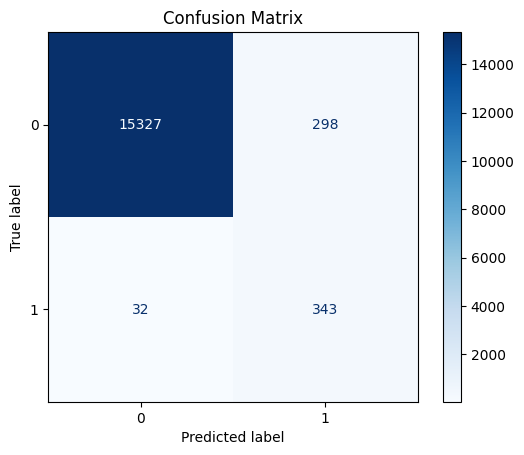

In [68]:
cm = confusion_matrix(y_test_cy, y_pred)

# Ploting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Evaluating the cost of the XGBOOST model

In [69]:
# making predictions on our model
y_pred = best_xgb.predict(X_test_cy)

accuracy = accuracy_score(y_test_cy, y_pred)
recall = recall_score(y_test_cy, y_pred)
f1 = f1_score(y_test_cy, y_pred)
precision = precision_score(y_test_cy, y_pred, zero_division=0)

print(f"Acurracy on test set: {accuracy:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 on test set: {f1:.4f}")
print(f"Precision on test set: {precision:.4f}")

total_cost = calculate_cost(y_test_cy, y_pred, cost_matrix)
print(f'Total cost with XGBoost model in the year 2022: ${total_cost}')

Acurracy on test set: 0.9886
Recall on test set: 0.8960
F1 on test set: 0.7860
Precision on test set: 0.7000
Total cost with XGBoost model in the year 2022: $29340


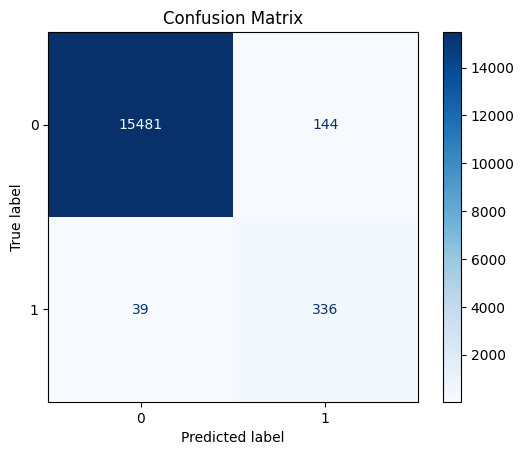

In [70]:
cm = confusion_matrix(y_test_cy, y_pred)

# Ploting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Most important features

In [71]:
feature_indices = [22, 81, 0, 83, 72, 70, 23, 68, 116, 14]  # most important features

feature_names = X.columns[feature_indices]
print(f'The most important features in our dataset are: {feature_names}')

The most important features in our dataset are: Index(['ap_000', 'ci_000', 'aa_000', 'ck_000', 'bv_000', 'bt_000', 'aq_000',
       'bj_000', 'dn_000', 'ah_000'],
      dtype='object')


These are the most important features and should be analyzed very carefully by the business to take appropriate measures.

# Conclusion

In the Random Forest model fo the year 2022 we have **Recall: 91.47% (343 TRUE POSITIVES, 32 FALSE NEGATIVES)**  and **298 FALSE POSITIVES**  
In the XGBOOST model fo the year 2022 we have **Recall: 89.60% (336 TRUE POSITIVES, 39 FALSE NEGATIVES)**  and **144 FALSE POSITIVES**  

While we have more false positives in the RF model, it only accounts for an increase in 2980 dollars but detects defective air systems slightly better. 

This classification problem is very important for the business because we can determine which features have the most impact on defective air systems, with this the business can take measures to better monitor them. Also detecting when the air system is defective is very important to avoid nuicances and breakdown during transportation. We know the company spent $375k  during 2022 with trucks that broke the air system and we demonstrated with 2 models the company should have spent about 27-30k dollars, saving up about 345k dollars which could be invested in other sectors. The company should also analyze the cost to invest in this type of system for other problems they might have. 
